In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('lenna.jpg',1)

In [3]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

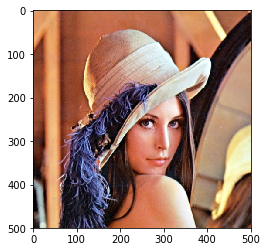

In [4]:
my_show(img)

## Gaussian Kernel

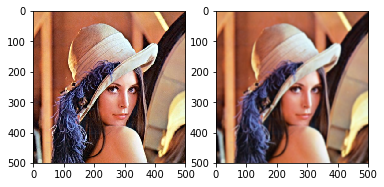

In [5]:
g_img = cv2.GaussianBlur(img,(11,11),2)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(g_img)

In [6]:
kernel_1d = cv2.getGaussianKernel(11,2)

In [7]:
g1_img = cv2.sepFilter2D(img,-1,kernel_1d,kernel_1d)

## laplacian

In [8]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [9]:
lap_img = cv2.filter2D(img,-1,kernel)

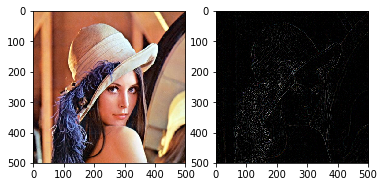

In [10]:
g_img = cv2.GaussianBlur(img,(11,11),2)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

In [11]:
kernel_strong = np.array([[1,1,1],[1,-8,1],[1,1,1]])
lap_img = cv2.filter2D(img,-1,kernel_strong)

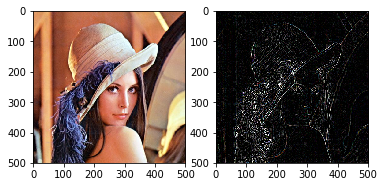

In [12]:
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

## 图像锐化

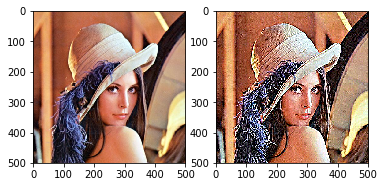

In [13]:
kernel_strong = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
lap_img = cv2.filter2D(img,-1,kernel_strong)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

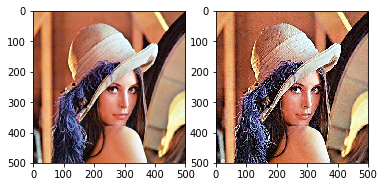

In [14]:
kernel_strong = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
lap_img = cv2.filter2D(img,-1,kernel_strong)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(lap_img)

## sobel

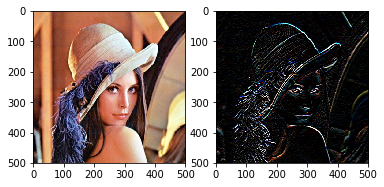

In [15]:
y_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sy_img = cv2.filter2D(img,-1,y_kernel)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sy_img)

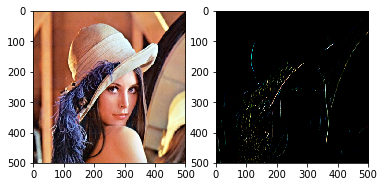

In [16]:
x_kernel = np.array([[-1,0,-1],[-2,0,2],[-1,0,1]])
sx_img = cv2.filter2D(img,-1,x_kernel)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sx_img)

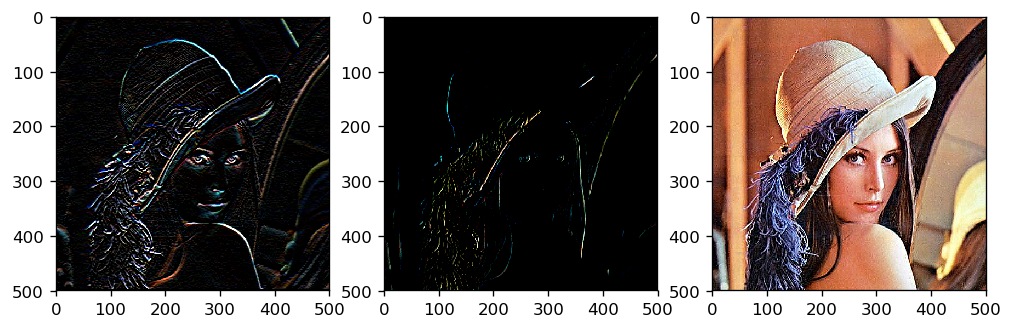

In [17]:
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(131)
my_show(sy_img)
plt.subplot(132)
my_show(sx_img)
plt.subplot(133)
my_show(lap_img)


## medianblur

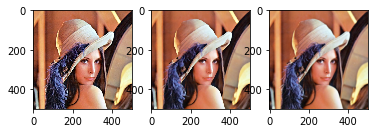

In [18]:
md_img = cv2.medianBlur(img,7)
plt.subplot(131)
my_show(img)
plt.subplot(132)
my_show(md_img)
plt.subplot(133)
my_show(g_img)

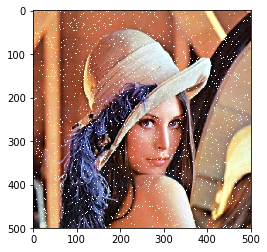

In [19]:
noise_img = cv2.imread('noisy_lenna.jpg',1)
my_show(noise_img)

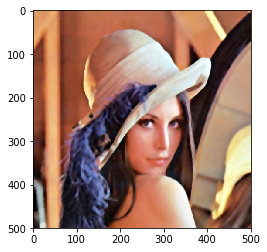

In [20]:
denoise_img = cv2.medianBlur(noise_img,7)
my_show(denoise_img)

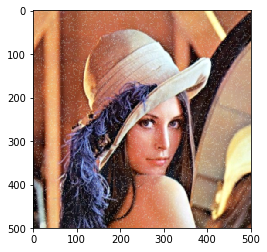

In [21]:
denoise_img = cv2.GaussianBlur(noise_img,(3,3),2)
my_show(denoise_img)

## Harris Corner

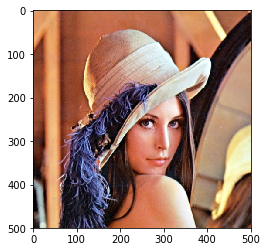

In [22]:
my_show(img)

In [23]:
img_gray = (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

In [24]:
def my_show_gray(img):
    plt.imshow(img,cmap='gray')

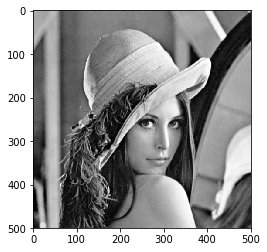

In [25]:
my_show_gray(img_gray)

In [26]:
img_harris = cv2.cornerHarris(img_gray,2,3,0.03)

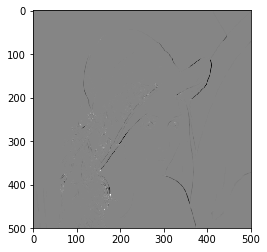

In [27]:
my_show_gray(img_harris)

In [72]:
img_harris

array([[-5.01832985e-11, -5.01832985e-11, -7.57553326e-11, ...,
         2.92261063e-07, -2.09157752e-05, -1.36394247e-05],
       [-5.01832985e-11, -5.01832985e-11, -7.57553326e-11, ...,
         2.92261063e-07, -2.09157752e-05, -1.36394247e-05],
       [ 1.01918654e-10,  1.01918654e-10,  1.40084999e-10, ...,
         3.48959247e-07, -2.44567327e-05, -1.48766167e-05],
       ...,
       [ 8.33262561e-08,  8.33262561e-08,  2.38183745e-07, ...,
         4.22016399e-07, -1.86622785e-07, -1.93641128e-07],
       [-6.78372558e-09, -6.78372558e-09,  1.68417102e-09, ...,
         1.05523100e-07,  2.55375809e-09, -5.79053214e-08],
       [-2.46164937e-08, -2.46164937e-08,  3.54918157e-08, ...,
         3.08590220e-09,  1.43225893e-08,  1.99297396e-08]], dtype=float32)

In [38]:
threshold = np.max(img_harris)*0.02

In [39]:
threshold

0.00016283337026834488

In [42]:
img = cv2.imread('lenna.jpg',1)
img[img_harris>threshold] = [0,0,255]
img

array([[[139, 158, 219],
        [141, 160, 221],
        [140, 161, 223],
        ...,
        [114, 171, 240],
        [ 93, 149, 220],
        [ 65, 121, 192]],

       [[139, 158, 219],
        [139, 160, 221],
        [140, 161, 223],
        ...,
        [123, 176, 243],
        [ 96, 149, 216],
        [ 64, 117, 184]],

       [[138, 159, 221],
        [137, 160, 222],
        [137, 160, 222],
        ...,
        [130, 174, 237],
        [102, 146, 209],
        [ 71, 115, 178]],

       ...,

       [[ 12,  17,  15],
        [  7,  12,  10],
        [ 16,  22,  21],
        ...,
        [ 48,  77, 146],
        [ 47,  76, 145],
        [ 47,  76, 145]],

       [[ 10,  15,  13],
        [  8,  13,  11],
        [ 20,  26,  25],
        ...,
        [ 52,  80, 151],
        [ 53,  81, 152],
        [ 54,  82, 153]],

       [[  9,  14,  12],
        [  9,  14,  12],
        [ 23,  29,  28],
        ...,
        [ 50,  78, 149],
        [ 53,  81, 152],
        [ 56,  84, 155]]

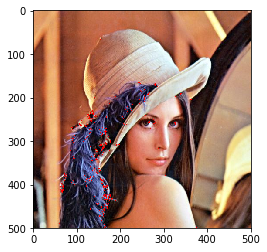

In [41]:
my_show(img)

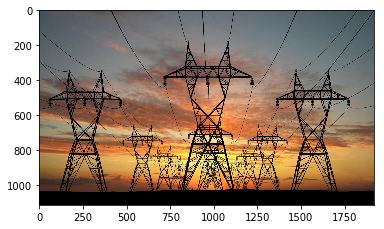

In [28]:
img_t = cv2.imread('towers.jpg',1)
my_show(img_t)

In [36]:
imgt_gray = (cv2.cvtColor(img_t,cv2.COLOR_BGR2GRAY))
imgt_harris = cv2.cornerHarris(imgt_gray,2,3,0.03)
# imgt_harris = cv2.dilate(imgt_harris,None)
imgt_harris

array([[-4.5408838e-10, -4.5408838e-10, -2.8326641e-10, ...,
         1.0663949e-08,  2.6232112e-07,  9.3627059e-06],
       [-4.5408838e-10, -4.5408838e-10, -2.8326641e-10, ...,
         1.0663949e-08,  2.6232112e-07,  9.3627059e-06],
       [-1.1086143e-09, -1.1086143e-09, -8.8395163e-10, ...,
         1.9821405e-07, -1.0080438e-05,  9.5346804e-05],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

numpy.ndarray

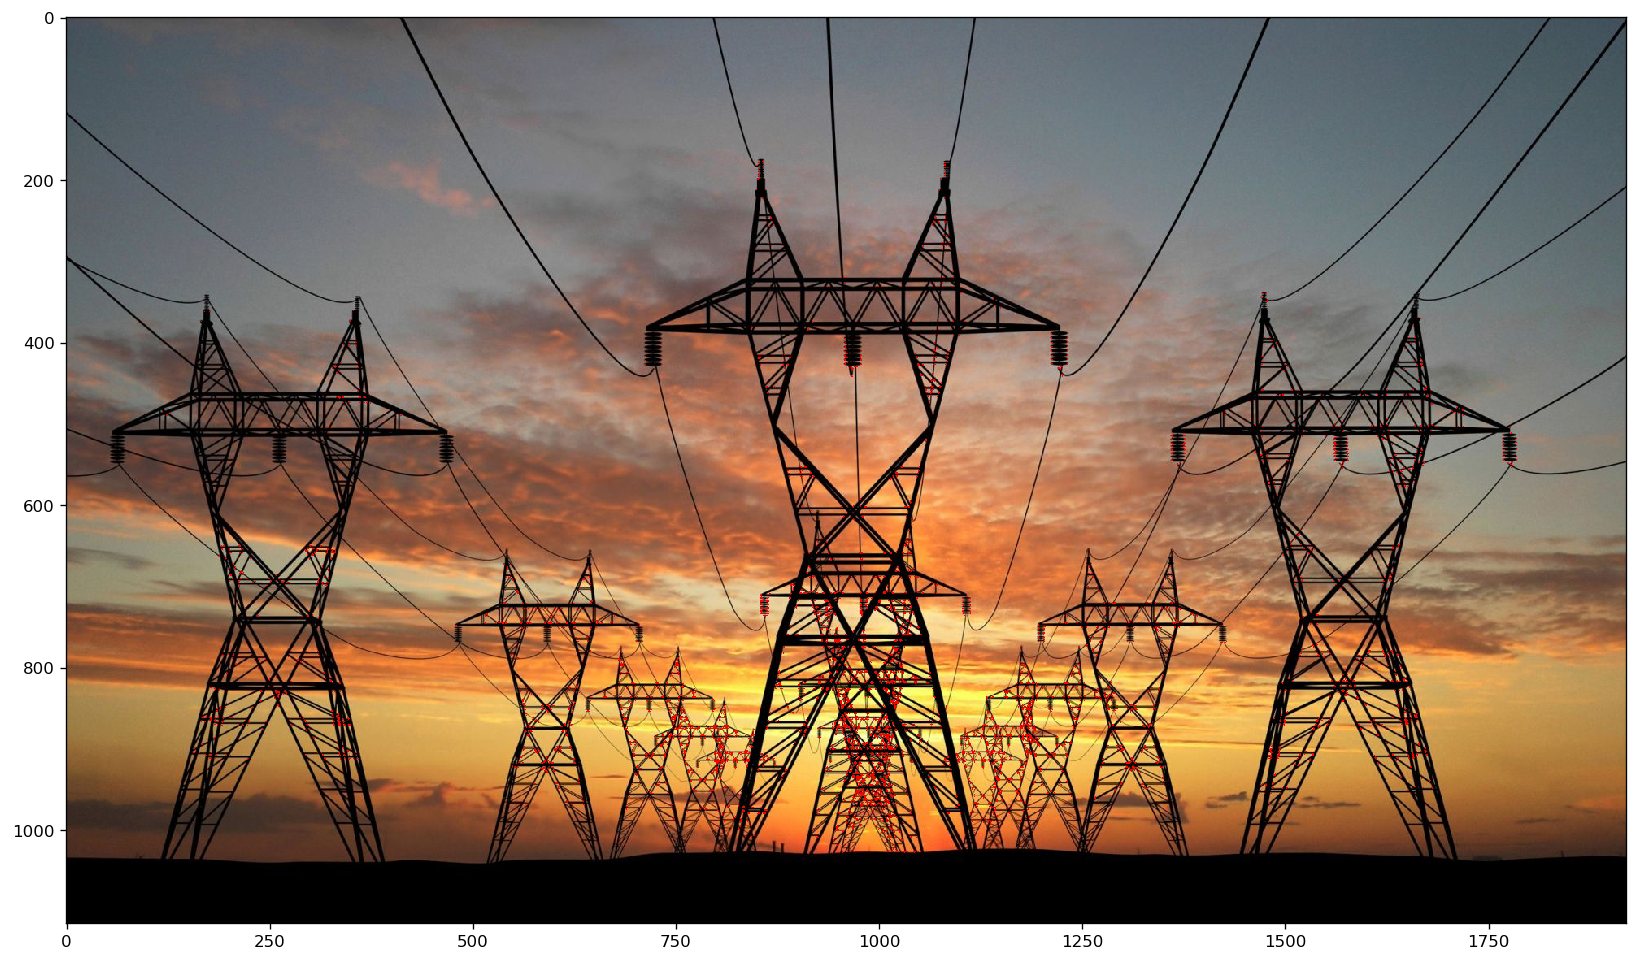

In [50]:
thresholdt = np.max(imgt_harris)*0.03
img_t[imgt_harris>thresholdt] = [0,0,255]
plt.figure(figsize=(20,10),dpi=120)
my_show(img_t)

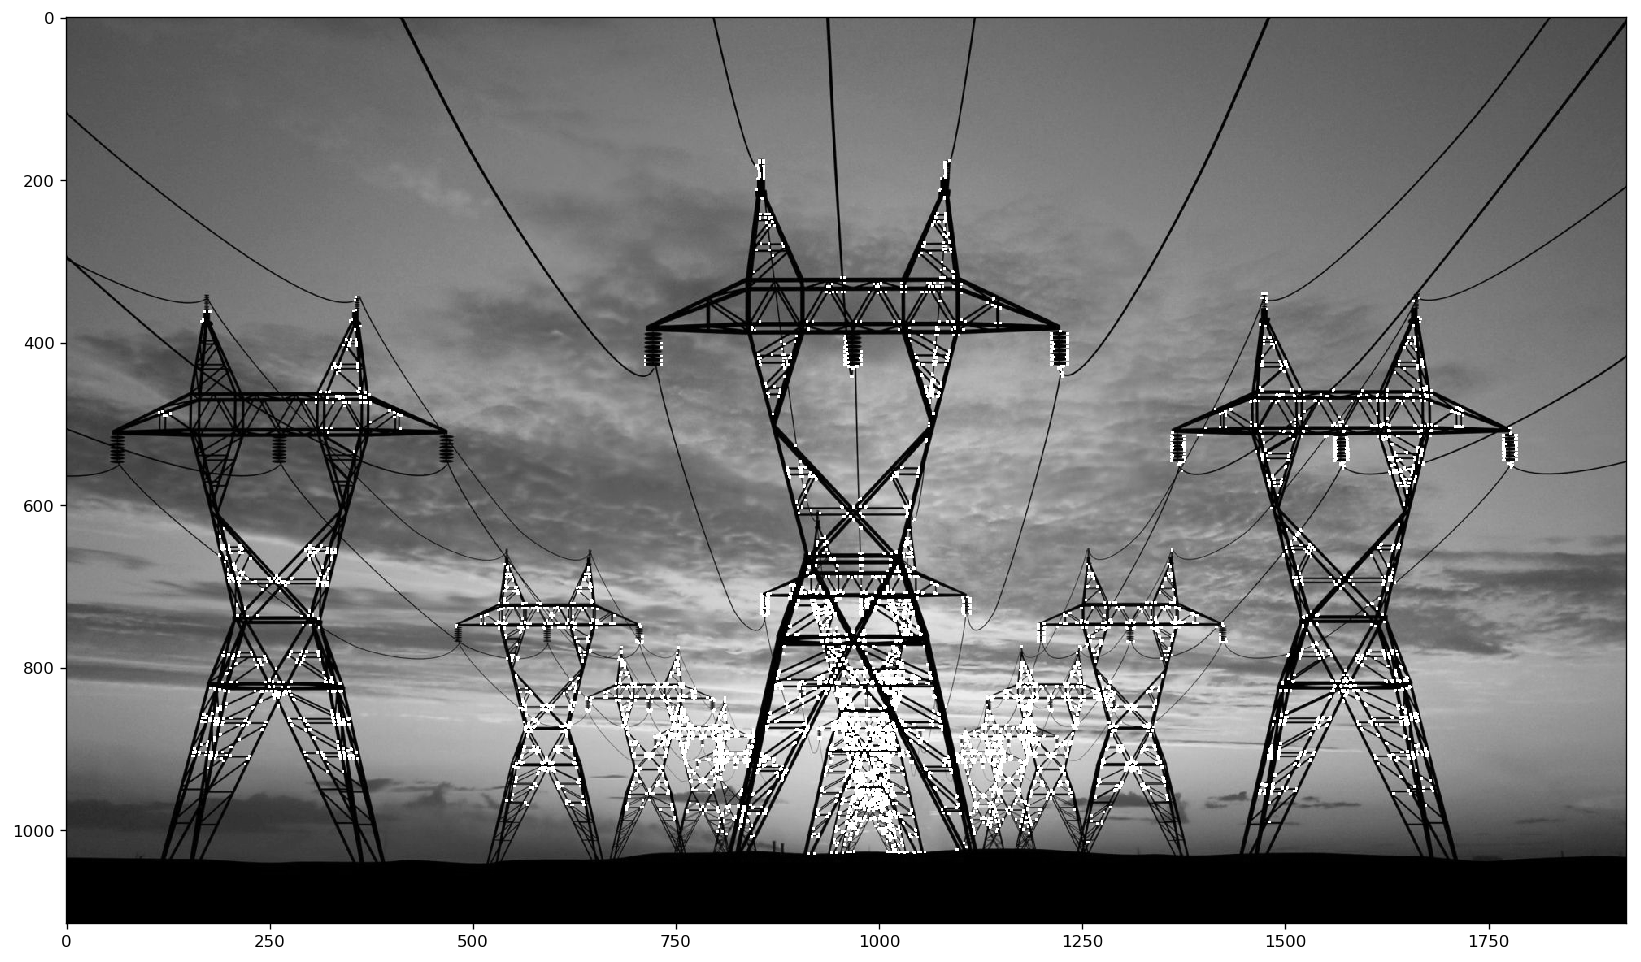

In [31]:
thresholdt = np.max(imgt_harris)*0.03
imgt_gray[imgt_harris>thresholdt] = 255
plt.figure(figsize=(20,10),dpi=120)
my_show_gray(imgt_gray)

## SIFT

In [100]:
cv2.__version__

'3.4.2'

In [114]:
img = cv2.imread('lenna.jpg')
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img)

In [115]:
len(kp)

1329

In [116]:
kp, des = sift.compute(img,kp)
print(des.shape)

(1329, 128)


In [124]:
img_sift = cv2.drawKeypoints(img, kp, outImage=np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

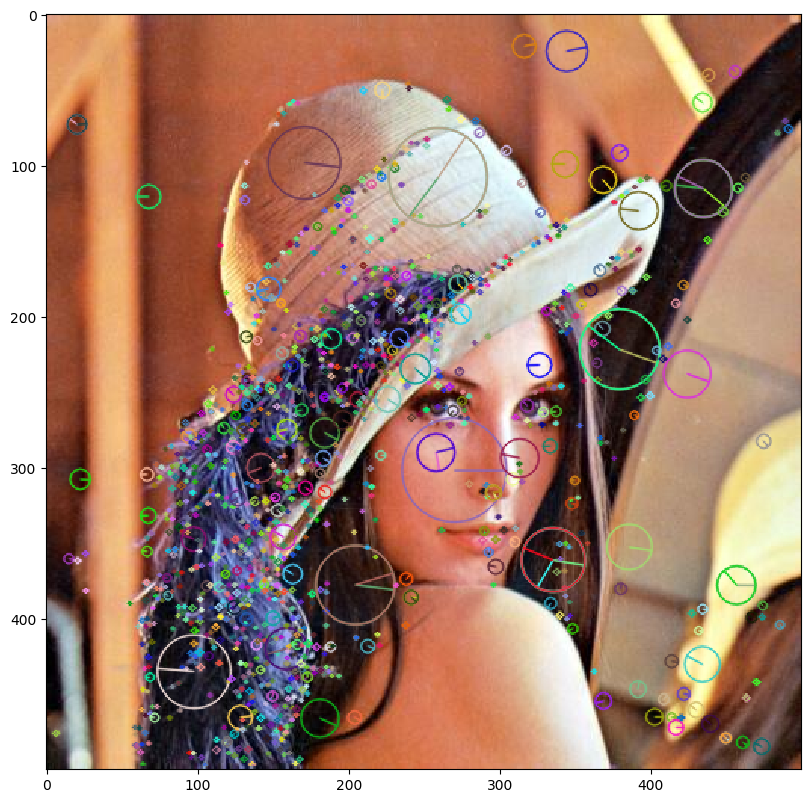

In [125]:
plt.figure(figsize=(10,10),dpi=100)
my_show(img_sift)